In [2]:
# Import stuff

In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import re

from nltk.tokenize import word_tokenize
import twokenize
matplotlib.style.use('ggplot')
pd.options.display.max_colwidth = 100

# ReadFile in

In [2]:
directory = "data/crawled-tweets/"
filename = "master-11-07-2016.csv"
src_file = directory+filename

df = pd.read_csv(src_file, names=["User", "timestamp_ms", "tweet", "longitude", "latitude", "retweet_count", "favorite_count", "flag"])
    

In [3]:
df.head(10)

,User,timestamp_ms,tweet,longitude,latitude,retweet_count,favorite_count,flag
0,123790755,1467376528316,#thedreamhunter is now trending in #London https://t.co/K1m5a2DSnm,-0.163024,51.511755,0,0,2
1,1442442398,1467376529077,@connoroneil__ cheers buddy X,-3.032089,53.841189,0,0,2
2,298585296,1467376529203,I love when Del Potro gets behind a forehand. He can just destroy a tennis ball.,-2.298134,52.847090,0,0,2
3,28834284,1467376529113,Well this is confusing https://t.co/uouPRGfeYw,-0.186833,51.127727,0,0,2
4,27009134,1467376529303,The Vaccines and Stereophonics at Kilmainham @ Royal Hospital Kilmainham https://t.co/vjaRRnDpWW,-6.300177,53.343303,0,0,1
5,49985646,1467376529400,End of an era at United. Giggs is set to leave. #tearingthemapart,-3.143354,51.669456,0,0,2
6,4658015859,1467376529390,"++ProToniX radio!⚡️ This weekend, packed with dope segments😁 &amp; music😝 @ London, United Kingd...",-0.127318,51.507115,0,0,1
7,421976071,1467376529514,@archiebald06 cost us £30 each more but fuck it!,1.302505,51.132408,0,0,2
8,409357313,1467376529910,@jaydevDevlin it's only a small get together...,-6.247621,53.354903,0,0,2
9,152766660,1467376529870,"@mshgodwin I'm thinking the second option, what do you think?",-2.803055,55.615368,0,0,2


In [4]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

def preprocess(data, tokenizingFunction):
    tweet = data.lower()
    #remove URLs
    tweet = re.sub(r"http\S+", " ", tweet)
    #remove Usernames
    tweet = re.sub(r"\@\S+", " ", tweet)
    #remove multiple blanks
    tweet = re.sub(' +',' ', tweet)
    #remove elongated elements of words
    tweet = re.sub('(.)\1{2,}','\1\1\1', tweet) 
    
    if callable(tokenizingFunction):
        tweet = tokenizingFunction(tweet)
    else:
        tweet = tweet.split()
    
    #remove those words were it's highly likely to encounter a bot
    spamWords =  {"mph", "hire", "watt", "ktt", "watt", "watts", "kts", "hiring", "bestbroadband", "barometer"}    
    stops = set.union(set(stopwords.words("english")), spamWords)
    tweet = [w for w in tweet if not w in stops and len(w) > 1] 
    
    #disable porter stemmer
    #porter_stemmer = PorterStemmer()
    #stemmed = []
    #for word in tweet: 
    #    stemmed.append(porter_stemmer.stem(word))
    #tweet = stemmed
    
    return tweet

In [5]:
lengthsOfTweets = df["tweet"].apply(preprocess, args=(word_tokenize,)).str.len()

KeyboardInterrupt: 

In [49]:
TwoklengthsOfTweets = df["tweet"].apply(preprocess, args=(twokenize.tokenize,)).str.len()

AttributeError: 'list' object has no attribute 'lower'

In [14]:
splitlengthsOfTweets = df["tweet"].apply(preprocess, args=("split",)).str.len()

In [15]:
print("Number of entries that have precise GPS coordinates")
df[df.flag != 2].shape

(146885, 8)

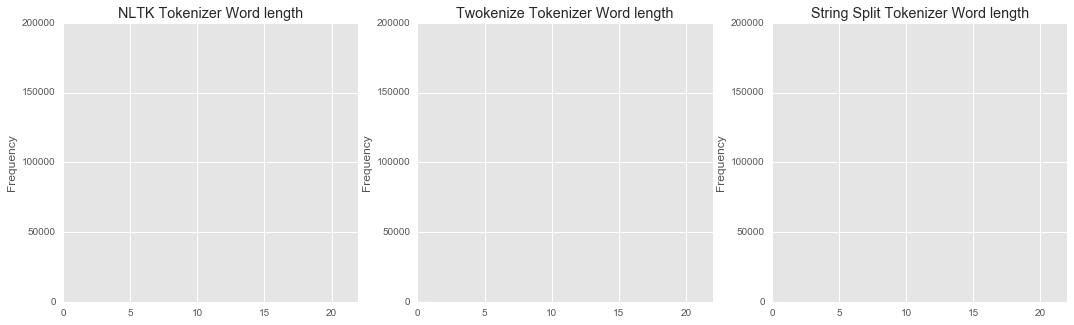

In [47]:
maxi = np.array([lengthsOfTweets.max(), TwoklengthsOfTweets.max(), splitlengthsOfTweets.max()]).max()
plt.figure(figsize=(18,5))
#NLTK Tokenizer Word length

plt.subplot(1, 3, 1)
lengthsOfTweets.plot.hist(alpha=0.5, bins=lengthsOfTweets.max())
#sns.distplot(lengthsOfTweets)
#plt.axis([0, 60, 0, 9000])
plt.axis([0, maxi, 0, 200000])
plt.title("NLTK Tokenizer Word length")

#Twokenize Tokenizer Word length
plt.subplot(1, 3, 2)
#sns.distplot(TwoklengthsOfTweets)
TwoklengthsOfTweets.plot.hist(alpha=0.5, bins=TwoklengthsOfTweets.max())

#plt.axis([0, 60, 0, 9000])
plt.axis([0, maxi, 0, 200000])
plt.title("Twokenize Tokenizer Word length")

#String.split Splitter Word length
plt.subplot(1, 3, 3)
#sns.distplot(splitlengthsOfTweets)


splitlengthsOfTweets.plot.hist(alpha=0.5, bins=splitlengthsOfTweets.max())
#plt.axis([0, 60, 0, 9000])
plt.axis([0, maxi, 0, 200000])

plt.title("String Split Tokenizer Word length")
plt.savefig("Preprocessing_evaluation_without_porter.png")
plt.show()


In [19]:
TwoklengthsOfTweets.head()

0    3
1    2
2    9
3    2
4    6
Name: tweet, dtype: int64

In [21]:
print(df["tweet"].head(10))
print(" ")
print(df["tweet"].head(10).apply(preprocess, args=(word_tokenize,)))
print(" ")
print(df["tweet"].head(10).apply(preprocess, args=(twokenize.tokenize,)))
print(" ")
print(df["tweet"].head(10).apply(preprocess, args=("split",)))

0                                     #thedreamhunter is now trending in #London https://t.co/K1m5a2DSnm
1                                                                          @connoroneil__ cheers buddy X
2                       I love when Del Potro gets behind a forehand. He can just destroy a tennis ball.
3                                                         Well this is confusing https://t.co/uouPRGfeYw
4       The Vaccines and Stereophonics at Kilmainham @ Royal Hospital Kilmainham https://t.co/vjaRRnDpWW
5                                      End of an era at United. Giggs is set to leave. #tearingthemapart
6    ++ProToniX radio!⚡️ This weekend, packed with dope segments😁 &amp; music😝 @ London, United Kingd...
7                                                       @archiebald06 cost us £30 each more but fuck it!
8                                                        @jaydevDevlin it's only a small get together...
9                                          @mshgodwin I

In [6]:
df["tweet"] = df["tweet"].apply(preprocess, args=(twokenize.tokenize,))

In [7]:
df2 = df[(df.tweet.str.len() > 2) ]

In [8]:
print(df2.tweet.head(10))

0                                                                  [#thedreamhunter, trending, #london]
2                                     [love, del, potro, gets, behind, forehand, destroy, tennis, ball]
4                                    [vaccines, stereophonics, kilmainham, royal, hospital, kilmainham]
5                                              [end, era, united, giggs, set, leave, #tearingthemapart]
6     [++protonix, radio, ⚡️, weekend, packed, dope, segments😁, &amp;, music😝, london, united, kingdom]
7                                                                                 [cost, us, £30, fuck]
8                                                                       ['s, small, get, together, ...]
9                                                                [i'm, thinking, second, option, think]
10                                               [gove, simply, next, pm, even, tory, 's, don't, trust]
11                                                     [word, ye

In [9]:
import gensim, logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
    
#size of wordembeddings
dimensions = 52

print("begin with word2vec")

model = gensim.models.Word2Vec(alpha=0.025, min_alpha=0.025, workers=4, size=dimensions, sg=0, min_count=2)  # use fixed learning rate
model.build_vocab(df2.tweet)
for epoch in range(10):
    model.train(df2.tweet)
    model.alpha -= 0.002  # decrease the learning rate
    model.min_alpha = model.alpha  # fix the learning rate, no decay
model.save("ukmodel.model")

begin with word2vec


In [25]:
print(model.similarity("pretty", "beautiful"))

0.140429593133


In [13]:
import numpy

def createPooledTweet(tweet):
        itera = 0
        maxpooledTweets = np.zeros(dimensions)
        for word in tweet:
            if word in model: 
                      
                #for k, dimen in enumerate(model[word]):
                    #if dimen > maxpooledTweets[i, k]:
                        #print(dimen)
                    #    maxpooledTweets[i, k] = dimen
                    #avg pooling
                itera += 1
                maxpooledTweets += model[word]
        return (maxpooledTweets / itera)
   
df2.wordEmbeddings = df2.tweet.apply(createPooledTweet)

In [15]:
#df2.reset_index(level=0, inplace=True)
df2.head()

,User,timestamp_ms,tweet,longitude,latitude,retweet_count,favorite_count,flag
0,123790755,1467376528316,"[#thedreamhunter, trending, #london]",-0.163024,51.511755,0,0,2
2,298585296,1467376529203,"[love, del, potro, gets, behind, forehand, destroy, tennis, ball]",-2.298134,52.847090,0,0,2
4,27009134,1467376529303,"[vaccines, stereophonics, kilmainham, royal, hospital, kilmainham]",-6.300177,53.343303,0,0,1
5,49985646,1467376529400,"[end, era, united, giggs, set, leave, #tearingthemapart]",-3.143354,51.669456,0,0,2
6,4658015859,1467376529390,"[++protonix, radio, ⚡️, weekend, packed, dope, segments😁, &amp;, music😝, london, united, kingdom]",-0.127318,51.507115,0,0,1


In [16]:
from datetime import datetime, date

try:
    df2["timestamp_ms"] = df2.timestamp_ms.apply(lambda x: datetime.fromtimestamp(int(x) // 1000))
    pd.to_datetime(df2.timestamp_ms)
    df2 = df2.set_index(['timestamp_ms'])
    df2.index
except:
    print("Data was already converted")


/Users/fabian/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [17]:
#df2["timestamp_ms"] = df2.timestamp_ms.astype('datetime64[ns]')
#df2["TimeReviewed"] = pd.to_datetime(df2["timestamp_ms"])

#split by day
groupedByDay = [group[1] for group in df2.groupby([df2.index.year,df2.index.month,df2.index.day])]

In [ ]:
#custom distance function ftw
from geopy.distance import great_circle
from scipy.spatial.distance import cosine, euclidean

#0 is lat, 1 is long, 3 is time, 4 to end is word embedding
def d(a,b):
    cos = cosine(a[4:], b[4:])
    euc = euclidean(a[3:], b[3:])
    vinc = (float(vincenty((a[0], a[1]), (b[0], b[1])).km))

    #print("text:" + str(cos))
    #print("time:" + str(euc))
    #print("spatial:"+ str(vinc))
return cos*5 + euc + vinc*0.01

Show clusters on map ...
start calculating
[ True  True False  True  True  True False False  True  True  True  True
  True  True  True False False  True  True  True  True False False False
  True  True  True  True  True  True  True False False  True  True False
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True False  True  True  True False  True  True  True  True
  True  True False  True  True  True  True  True False  True  True  True
  True  True  True False  True  True  True  True False  True  True  True
 False  True False  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True False False False False  True
 False  True False  True False  True  True False  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True False  True False False  True False  True  True False  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  

SystemError: <class 'RuntimeError'> returned a result with an error set

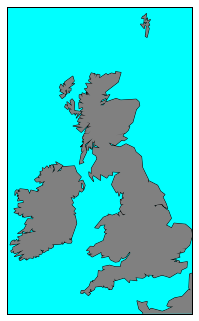

In [19]:
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import cosine, euclidean
import time
from mpl_toolkits.basemap import Basemap
import matplotlib.cm as cm

for dailyTweets in groupedByDay:
    start = time.time()
    
    firstN = 500
    columns = ["longitude", "latitude"]
    features = dailyTweets[list(columns)].head(firstN).values
    
    #run DBSCAN on coordinates using euclidean distance 
    dbmodel = DBSCAN(eps=0.5, min_samples=5, metric="euclidean", algorithm='ball_tree')
    db = dbmodel.fit(features)
    end = time.time()
    
    #masking
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    labels = db.labels_
    n_clusters_ = len(np.unique(db.labels_)) -1
    
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    
    ####map config
    #TODO: Zoom in to each cluster on the map if possible
    bbox = {
        'll_lon': -10.65073,
        'll_lat': 49.16209,
        'ur_lon': 1.76334,
        'ur_lat': 60.860699
    }

    print("Show clusters on map ...")
    m = Basemap(
        projection='merc', resolution="l",
        llcrnrlon=bbox['ll_lon'], llcrnrlat=bbox['ll_lat'],
        urcrnrlon=bbox['ur_lon'], urcrnrlat=bbox['ur_lat'])
    m.drawcoastlines()#
    m.fillcontinents(color='gray', lake_color='aqua',zorder=5)

    m.drawmapboundary(fill_color='aqua')
    ####end map config

    clusterLabels = db.labels_
    print("start calculating")

    for k, col in zip(unique_labels, colors):

        if k == -1:
            # Black used for noise.
            col = 'k'
        class_member_mask = (labels == k)
        #print(k)
        print(class_member_mask)

        numOfDistinctUsers = len(set(df2.User[class_member_mask]))

        x1, y1 = m(df2.head(firstN).longitude[class_member_mask], df2.head(firstN).latitude[class_member_mask])
        if k == -1 or numOfDistinctUsers < 2:
            pass
                #m.scatter(x1, y1, s=4, marker="o", c=col, alpha=0.5, zorder=10)
        else:

            #plot k to map at position 
            wordsOfCluster = []
            tweetsOfCluster = []
            xtxt = 0
            ytxt = 0

            for i, label in enumerate(clusterLabels):

                if label == k:
                    #das ist der tweet
                    #print(' '.join(tweets[i]))
                    tweetsOfCluster.append(' '.join(tweets[i]))
                    if xtxt == 0 and ytxt == 0:
                        xtxt, ytxt = m(dat[i,0], dat[i,1])
                    for word in tweets[i]:
                        wordsOfCluster.append(word)

            #evaluate clusters
            wfcnt = Counter(wordsOfCluster)

            if wfcnt.most_common()[0][1]/len(x1) > 0.1:

                print(str(n_clusters_) + ". Cluster, with " + str(xy.shape[0]) + " tweets, " + str(numOfDistinctUsers) + " distinct users, " +
                    "the most freq. words are:")

                print(wfcnt.most_common()[0:15])


                #plot points
                m.scatter(x1, y1, s=50, marker="o", c=col, alpha=1, zorder=10)

                #print cluster numbers on plot      
                plt.text(xtxt, ytxt, str(k), fontsize=12,fontweight='bold',
                        ha='left',va='bottom',color='k', zorder=15)

                print(tweetsOfCluster)
                print(" ------------- ")
                print(" ")
                n_clusters_ += 1

    plt.title("Clustered tweets from GB %d" % n_clusters_)
    plt.savefig(time.strftime("plots/test-%h-%m-%s-%d-%m-%Y.png"))
    plt.show()
    
    #dailyTweets
    print(str(dailyTweets.index.day[0]) + " Day Clustered. The passed time is: " + str(end-start))
    break

# This section needs to be refined so that for each day a topic map is created

Show clusters on map ...
start calculating
[ True  True]


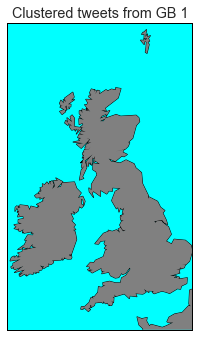